In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
house = pd.read_csv('C:/Python/Class/Class 16-17 Files/2. Case Study - Predicting House Prices/House_Prices.csv')
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [4]:
import pandas_profiling

In [6]:
output = pandas_profiling.ProfileReport(house)
output.to_file(output_file='pandas_profiling_house.html')

In [18]:
num_var = [key for key in dict(house.dtypes) if dict(house.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var = [key for key in dict(house.dtypes) if dict(house.dtypes)[key] in ['object', 'O']]

In [7]:
num_var

['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']

In [8]:
cat_var

['Brick', 'Neighborhood']

In [92]:
house['Brick'].value_counts()

0    86
1    42
Name: Brick, dtype: int64

In [117]:
house['Neighborhood'].value_counts()

East     45
North    44
West     39
Name: Neighborhood, dtype: int64

In [19]:
house['Brick'] = np.where(house['Brick'] == 'Yes',1,0)

In [20]:
house_new = pd.get_dummies(house['Neighborhood'], drop_first=True)

In [21]:
house = pd.concat([house,house_new], axis=1)
house.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,North,West
0,1,114300,1790,2,2,2,0,East,0,0
1,2,114200,2030,4,2,3,0,East,0,0
2,3,114800,1740,3,2,1,0,East,0,0
3,4,94700,1980,3,2,3,0,East,0,0
4,5,119800,2130,3,3,3,0,East,0,0


In [68]:
house = house.drop(['Home','Neighborhood'], axis=1)

In [69]:
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,North,West,Price_new
0,114300,1790.0,2.0,2,2,0,0,0,11.646582
1,114200,2030.0,4.0,2,3,0,0,0,11.645707
2,114800,1740.0,3.0,2,1,0,0,0,11.650947
3,94700,1980.0,3.0,2,3,0,0,0,11.458469
4,119800,2130.0,3.0,3,3,0,0,0,11.693579


In [70]:
house.dtypes

Price          int64
SqFt         float64
Bedrooms     float64
Bathrooms      int64
Offers         int64
Brick          int32
North          int32
West           int32
Price_new    float64
dtype: object

In [71]:
house[['North','West']]= house[['North','West']].astype('int32')

In [72]:
house.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,North,West,Price_new
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130388.218750,2000.804688,3.019219,2.437500,2.570312,0.328125,0.343750,0.304688,11.758300
std,26280.461229,207.625863,0.715071,0.498028,1.047559,0.471376,0.476825,0.462084,0.200819
min,81570.000000,1530.800000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,11.309217
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,11.620208
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,11.743638
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,11.906647
max,196476.000000,2505.700000,4.730000,3.000000,5.000000,1.000000,1.000000,1.000000,12.188296


In [25]:
house['Price'].quantile(0.01)

81570.0

In [142]:
house['Price'].quantile(0.99)

196476.00000000003

In [7]:
def outlier_treat(x):
    x = x.clip(upper = x.quantile(0.99),lower = x.quantile(0.01))
    return x

In [47]:
house = house.apply(outlier_treat)

In [73]:
house.describe()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,North,West,Price_new
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,130388.218750,2000.804688,3.019219,2.437500,2.570312,0.328125,0.343750,0.304688,11.758300
std,26280.461229,207.625863,0.715071,0.498028,1.047559,0.471376,0.476825,0.462084,0.200819
min,81570.000000,1530.800000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,11.309217
25%,111325.000000,1880.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,11.620208
50%,125950.000000,2000.000000,3.000000,2.000000,3.000000,0.000000,0.000000,0.000000,11.743638
75%,148250.000000,2140.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,11.906647
max,196476.000000,2505.700000,4.730000,3.000000,5.000000,1.000000,1.000000,1.000000,12.188296


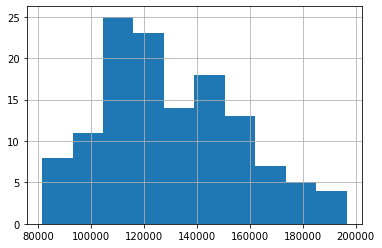

In [56]:
house['Price'].hist()

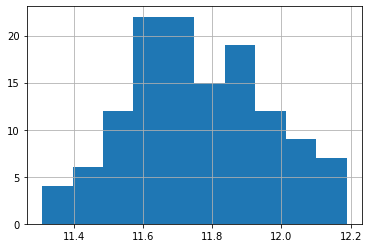

In [61]:
np.log(house['Price']).hist()

In [62]:
house['Price_new'] = np.log(house['Price'])

In [81]:
del house['Price']
house.head()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,North,West,Price_new
0,1790.0,2.0,2,2,0,0,0,11.646582
1,2030.0,4.0,2,3,0,0,0,11.645707
2,1740.0,3.0,2,1,0,0,0,11.650947
3,1980.0,3.0,2,3,0,0,0,11.458469
4,2130.0,3.0,3,3,0,0,0,11.693579


In [82]:
house.corr()

,SqFt,Bedrooms,Bathrooms,Offers,Brick,North,West,Price_new
SqFt,1.000000,0.481769,0.520577,0.338639,0.088258,-0.286627,0.247038,0.553127
Bedrooms,0.481769,1.000000,0.384359,0.119065,0.038610,-0.365929,0.476137,0.506316
Bathrooms,0.520577,0.384359,1.000000,0.182055,0.155127,-0.273551,0.271585,0.493268
Offers,0.338639,0.119065,0.182055,1.000000,-0.142766,0.329560,-0.329272,-0.326033
Brick,0.088258,0.038610,0.155127,-0.142766,1.000000,-0.260554,0.115793,0.443745
North,-0.286627,-0.365929,-0.273551,0.329560,-0.260554,1.000000,-0.479098,-0.562398
West,0.247038,0.476137,0.271585,-0.329272,0.115793,-0.479098,1.000000,0.697178
Price_new,0.553127,0.506316,0.493268,-0.326033,0.443745,-0.562398,0.697178,1.000000


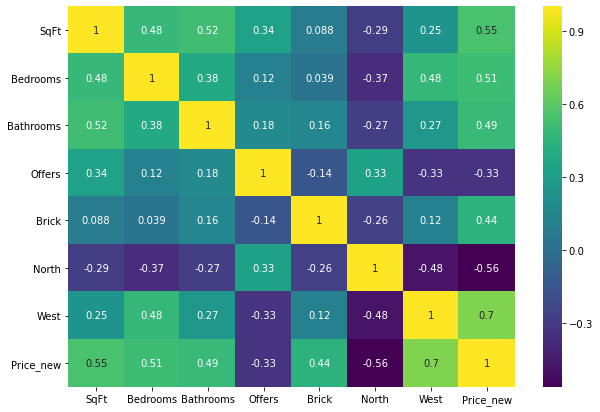

In [83]:
plt.figure(figsize=(10,7))
sns.heatmap(house.corr(),annot = True, cmap = 'viridis')

In [84]:
house.corrwith(house['Price_new'])

SqFt         0.553127
Bedrooms     0.506316
Bathrooms    0.493268
Offers      -0.326033
Brick        0.443745
North       -0.562398
West         0.697178
Price_new    1.000000
dtype: float64

In [85]:
#Correlation with output variable
cor = abs(house.corrwith(house['Price_new']))
#Selecting highly correlated features
relevant_features = cor[cor>0.5]
relevant_features

SqFt         0.553127
Bedrooms     0.506316
North        0.562398
West         0.697178
Price_new    1.000000
dtype: float64

### Select k-Best

In [124]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression, f_oneway

In [127]:
X = house.iloc[:,:-1]
y = house.iloc[:,-1]

In [134]:
selectkbest = SelectKBest(f_oneway, k=5)

In [135]:
selectkbest = selectkbest.fit(X,y)

In [136]:
selectkbest.get_support()

array([False,  True,  True, False,  True,  True,  True])

In [139]:
k_features = pd.Series(X.columns[selectkbest.get_support()])
k_features

0     Bedrooms
1    Bathrooms
2        Brick
3        North
4         West
dtype: object

### F_Regression

In [174]:
F_values, p_values  = f_regression(X,y)

In [179]:
f_reg_results = pd.concat([pd.Series(X.columns), pd.Series(F_values), pd.Series(p_values)],axis=1)

In [ ]:
f_reg_results.columns = ['Feature', 'F_Value', 'P_Value']

In [185]:
f_reg_results.sort_values('F_Value', ascending=False)

,Feature,F_Value,P_Value
6,West,119.163515,6.189539e-20
5,North,58.289155,4.905181e-12
0,SqFt,55.542882,1.283318e-11
1,Bedrooms,43.435791,1.079307e-09
2,Bathrooms,40.515506,3.307682e-09
4,Brick,30.893996,1.552434e-07
3,Offers,14.986508,1.729189e-04


### Recursive Feature Elimination (RFE)

In [186]:
from sklearn.linear_model import LinearRegression as lm

In [189]:
rfe_model  = RFE(lm(),5)

In [191]:
rfe_var = rfe_model.fit(X,y)

In [194]:
rfe_var.get_support()

array([False,  True,  True,  True,  True, False,  True])

In [195]:
rfe_var = pd.Series(X.columns[rfe_var.get_support()])
rfe_var

0     Bedrooms
1    Bathrooms
2       Offers
3        Brick
4         West
dtype: object

### variable inflation factor (VIF By remove multicollinierity)

In [197]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [226]:
VIF = pd.DataFrame()
VIF['Vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
VIF["features"] = X.columns

In [227]:
VIF

,Vif,features
0,60.905710,SqFt
1,31.801929,Bedrooms
2,37.086275,Bathrooms
3,11.039705,Offers
4,1.634121,Brick
5,2.129110,North
6,2.466554,West


In [290]:
Vif_features = X[X.columns.difference(['Offers','Bathrooms','SqFt'])]

In [291]:
VIF = pd.DataFrame()
VIF['Vif'] = [variance_inflation_factor(Vif_features.values,i) for i in range(Vif_features.shape[1])]
VIF["features"] = Vif_features.columns
VIF

,Vif,features
0,3.505925,Bedrooms
1,1.512440,Brick
2,1.760950,North
3,2.120912,West


In [292]:
Vif_features.columns

Index(['Bedrooms', 'Brick', 'North', 'West'], dtype='object')

In [274]:
from sklearn.model_selection import train_test_split

In [294]:
house_final = pd.concat([Vif_features,y], axis=1)
house_final.head()

,Bedrooms,Brick,North,West,Price_new
0,2.0,0,0,0,11.646582
1,4.0,0,0,0,11.645707
2,3.0,0,0,0,11.650947
3,3.0,0,0,0,11.458469
4,3.0,0,0,0,11.693579


In [300]:
train, test = train_test_split(house_final, test_size = 0.3, random_state =123)

In [301]:
train

,Bedrooms,Brick,North,West,Price_new
79,4.0,0,0,1,11.874787
104,3.0,0,0,0,11.318126
60,3.0,0,0,1,12.105700
21,3.0,0,1,0,11.642198
11,2.0,1,0,0,11.719940
...,...,...,...,...,...
98,3.0,0,0,1,11.887931
92,3.0,0,0,1,11.867799
66,3.0,0,1,0,11.745623
109,3.0,0,0,0,11.596347


In [302]:
test

,Bedrooms,Brick,North,West,Price_new
4,3.00,0,0,0,11.693579
123,3.00,1,0,0,11.692744
90,4.00,0,0,1,11.871299
82,2.00,1,0,1,12.012488
42,2.00,0,0,0,11.567414
28,2.00,0,1,0,11.309217
29,4.00,1,0,1,12.144197
111,2.00,0,1,0,11.651817
95,2.00,1,0,1,11.934920
33,4.73,1,0,0,11.846536


In [246]:
import statsmodels.formula.api as smf

In [296]:
formula = 'Price_new' + '~' +'+'.join(Vif_features)
formula

'Price_new~Bedrooms+Brick+North+West'

In [297]:
model = smf.ols(formula, data = train)

In [298]:
model = model.fit()

In [299]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_new   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     39.35
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.57e-18
Time:                        13:42:17   Log-Likelihood:                 63.774
No. Observations:                  89   AIC:                            -117.5
Df Residuals:                      84   BIC:                            -105.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.4903      0.073    156.977      0.000      11.345      11.636
Bedrooms       0.0565      0.023      2.429      0.017       0.010       0.103
Brick          0.1428      0.031      4.608      0.000       0.081       0.204
North         -0.0665      0.032     -2.058      0.043      -0.131      -0.002
West           0.2220      0.037      6.072      0.000       0.149       0.295
==============================================================================
Omnibus:                        0.683   Durbin-Watson:                   2.290
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.378
Skew:                          -0.151   Prob(JB):                        0.828
Kurtosis:                       3.104   Cond. No.                         19.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [309]:
actual_y = np.exp(test['Price_new'])
pred_y = np.exp(model.predict(test))

In [319]:
#Metrics for test data
MAPE_test = np.mean(np.abs(actual_y - pred_y)/actual_y)
print('Test_MAPE=', MAPE_test)
RMSE_test = np.sqrt(np.mean(np.square(actual_y - pred_y)))
print('Test_RMSE=',RMSE_test)
RMSPE_test =np.sqrt(np.mean(np.square((actual_y - pred_y)/actual_y)))
print('Test_RMSPE=',RMSPE_test)
corr_test = np.corrcoef(actual_y, pred_y)[1][0]
print('Test_Corr=',corr_test)

Test_MAPE= 0.07491762209925157
Test_RMSE= 12756.678846827775
Test_RMSPE= 0.09766284767194587
Test_Corr= 0.8702530130085063


In [311]:
from sklearn import metrics

In [317]:
print('MAE:', metrics.mean_absolute_error(actual_y, pred_y))

MAE: 9861.060479357298


In [330]:
df = pd.DataFrame({'Actual': actual_y, 'Predicted': pred_y, 'Error' : (actual_y - pred_y), 'Error Per' : (np.abs(actual_y - pred_y)/actual_y)})
df.head()

,Actual,Predicted,Error,Error Per
4,119800.0,115837.560165,3962.439835,0.033075
123,119700.0,133619.221466,-13919.221466,0.116284
90,143100.0,153037.359513,-9937.359513,0.069443
82,164800.0,157655.496679,7144.503321,0.043353
42,105600.0,109470.086317,-3870.086317,0.036649


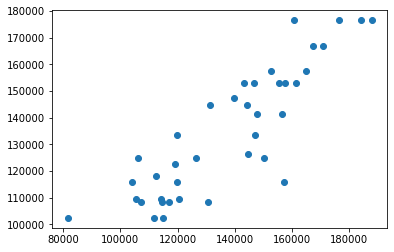

In [305]:
plt.scatter(actual_y, pred_y)

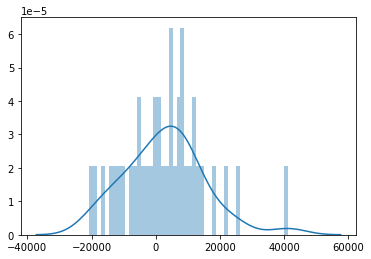

In [308]:
sns.distplot((actual_y - pred_y),bins=50)

In [331]:
np.corrcoef(actual_y, pred_y)

array([[1.        , 0.87025301],
       [0.87025301, 1.        ]])